In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passi

1.8.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

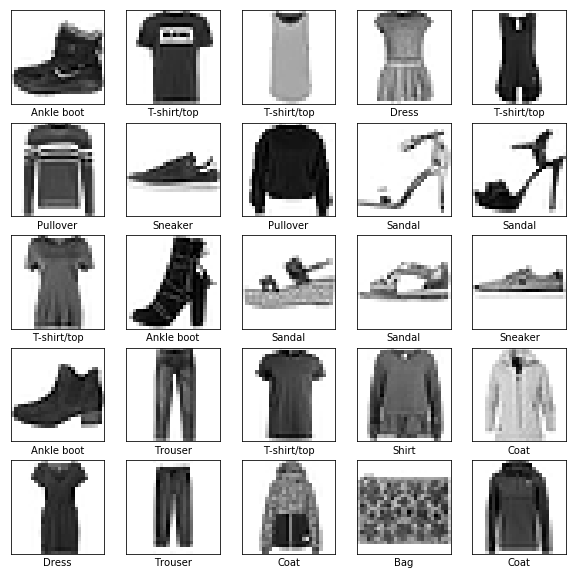

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid('off')
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])

In [12]:
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128,activation=tf.nn.relu), keras.layers.Dense(10, activation=tf.nn.softmax) ])

In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.4949 - acc: 0.8263
Epoch 2/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3765 - acc: 0.8643
Epoch 3/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.3340 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.3140 - acc: 0.8838
Epoch 5/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.2939 - acc: 0.8912


In [16]:
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 32us/step
Test accuracy: 0.8702


In [17]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([5.9827621e-06, 1.7633351e-07, 1.4455100e-07, 8.1860139e-07,
       1.0263705e-06, 7.7800667e-03, 1.6781409e-05, 1.0054642e-01,
       9.0654958e-06, 8.9163953e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

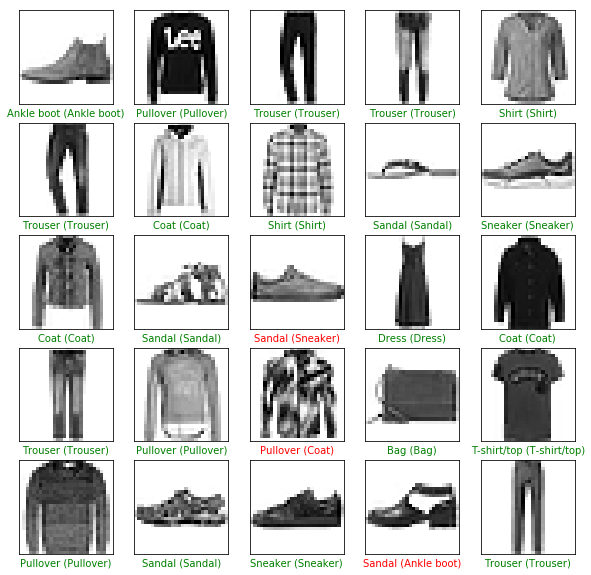

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color= 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                    class_names[true_label]),
                                    color=color)
                            
    

In [23]:
img = test_images[0]

print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions = model.predict(img)

print(predictions)

[[5.9827507e-06 1.7633401e-07 1.4455071e-07 8.1859986e-07 1.0263694e-06
  7.7800667e-03 1.6781392e-05 1.0054644e-01 9.0654867e-06 8.9163953e-01]]


In [28]:
prediction = predictions[0]

np.argmax(prediction)

9